In [3]:
# =========================
# Import required libraries
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys

# -----------------------------
# Link src folder for custom modules
# -----------------------------
sys.path.append("D:/Personal/KAIM-10 Academy/Week 9/Project/portfolio-optimization-week9/src")

# -----------------------------
# Import custom modules
# -----------------------------
import metrics
import visualization
import portfolio_optimize  # if you want to access portfolio weights directly

In [4]:
import pandas as pd
from pathlib import Path
import numpy as np

# Load CSV
data_file = Path("D:/Personal/KAIM-10 Academy/Week 9/Project/portfolio-optimization-week9/data/processed/all_assets_clean.csv")
prices_df = pd.read_csv(data_file, parse_dates=["Date"])

# Pivot to wide format
prices_clean = prices_df.pivot(index="Date", columns="Ticker", values="Price")

# Convert all columns to numeric (float)
prices_clean = prices_clean.apply(pd.to_numeric, errors='coerce')

# Replace zeros with NaN (cannot interpolate zeros)
prices_clean = prices_clean.replace(0, np.nan)

# Interpolate missing values linearly and fill remaining NaNs
prices_clean = prices_clean.interpolate(method='linear').bfill().ffill()

# Ensure all columns are now float
print(prices_clean.dtypes)
print("Any NaNs left?", prices_clean.isna().sum().sum())

Ticker
BND     float64
SPY     float64
TSLA    float64
dtype: object
Any NaNs left? 0


1.	Define Backtesting Period

Backtest Annual Return: 13.89%
Backtest Annual Volatility: 10.99%
Backtest Sharpe Ratio: 1.26


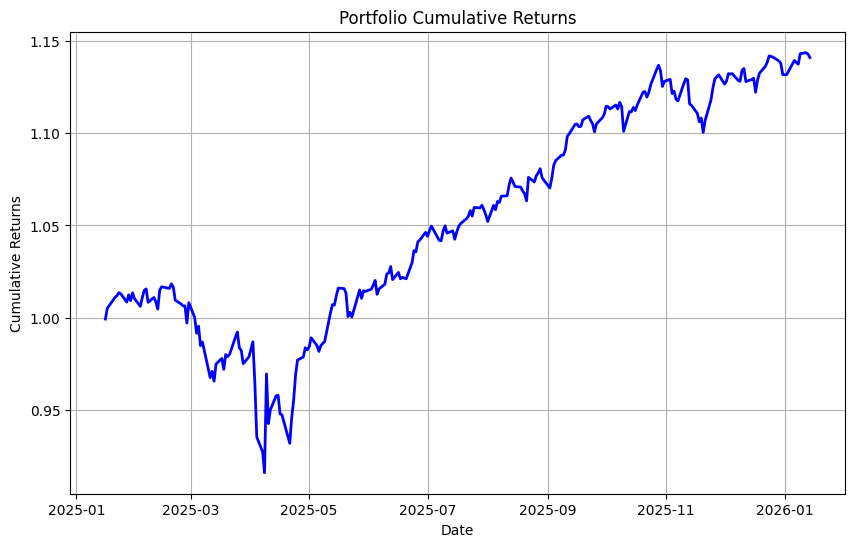

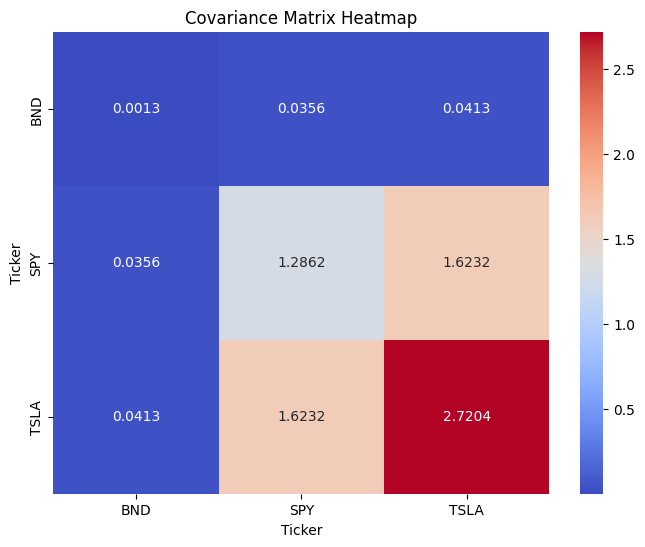

In [5]:
# Use backtesting period defined earlier
backtest_prices = prices_clean.loc["2025-01-15":"2026-01-14"]

# Max Sharpe Portfolio weights from Task 4
weights = [0.50, 0.473, 0.027]  # BND, SPY, TSLA

# -----------------------------
# Compute metrics
# -----------------------------
portfolio_returns = metrics.portfolio_daily_returns(backtest_prices, weights)
cumulative_returns = metrics.portfolio_cumulative_returns(portfolio_returns)
annual_return, annual_vol, sharpe = metrics.portfolio_performance(portfolio_returns)

print(f"Backtest Annual Return: {annual_return:.2%}")
print(f"Backtest Annual Volatility: {annual_vol:.2%}")
print(f"Backtest Sharpe Ratio: {sharpe:.2f}")

# -----------------------------
# Visualizations
# -----------------------------
visualization.plot_portfolio_cumulative(cumulative_returns)
visualization.plot_covariance_heatmap(backtest_prices.cov()*252)  # annualized

2.	Define a Benchmark

Benchmark Annual Return: 14.76%
Benchmark Annual Volatility: 12.08%
Benchmark Sharpe Ratio: 1.22


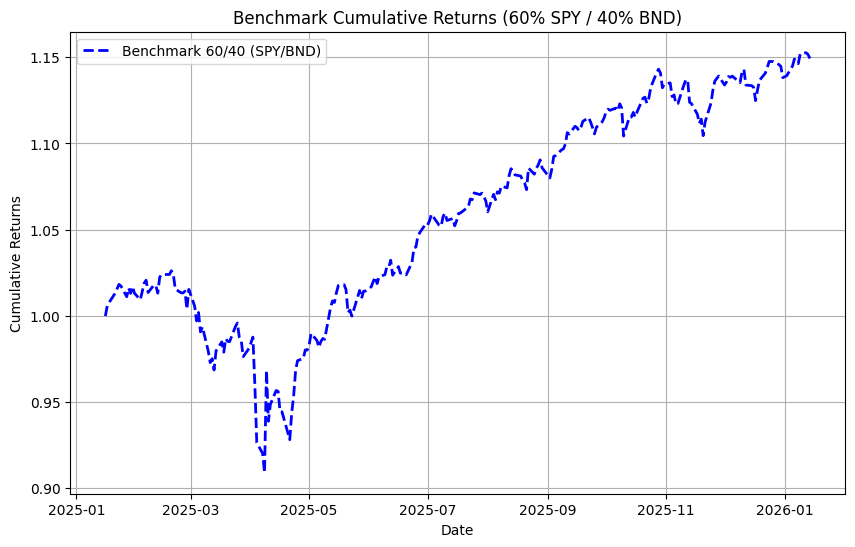

In [8]:
# ===============================
# 2️⃣ Define Benchmark Portfolio
# ===============================
import numpy as np
import matplotlib.pyplot as plt

# --- Define Benchmark Weights ---
# Static 60% SPY / 40% BND
benchmark_weights = np.array([0.4, 0.6, 0.0])  # BND, SPY, TSLA not included

# --- Backtest Prices for Benchmark ---
backtest_prices = prices_clean.loc["2025-01-15":"2026-01-14"]
backtest_prices = backtest_prices.astype(float)

# --- Benchmark Daily Returns ---
benchmark_returns = (backtest_prices.pct_change().dropna() * benchmark_weights).sum(axis=1)

# --- Benchmark Cumulative Returns ---
benchmark_cum_returns = (1 + benchmark_returns).cumprod()

# --- Benchmark Performance Metrics ---
benchmark_annual_return = benchmark_returns.mean() * 252
benchmark_annual_vol = benchmark_returns.std() * np.sqrt(252)
benchmark_sharpe = benchmark_annual_return / benchmark_annual_vol  # risk-free = 0

print(f"Benchmark Annual Return: {benchmark_annual_return:.2%}")
print(f"Benchmark Annual Volatility: {benchmark_annual_vol:.2%}")
print(f"Benchmark Sharpe Ratio: {benchmark_sharpe:.2f}")

# --- Optional: Plot Cumulative Returns ---
plt.figure(figsize=(10,6))
plt.plot(benchmark_cum_returns, label="Benchmark 60/40 (SPY/BND)", color='blue', linestyle='--', linewidth=2)
plt.title("Benchmark Cumulative Returns (60% SPY / 40% BND)")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.grid(True)
plt.show()

3.	Simulate My Strategy

Portfolio Annual Return: 13.89%
Portfolio Annual Volatility: 10.99%
Portfolio Sharpe Ratio: 1.26


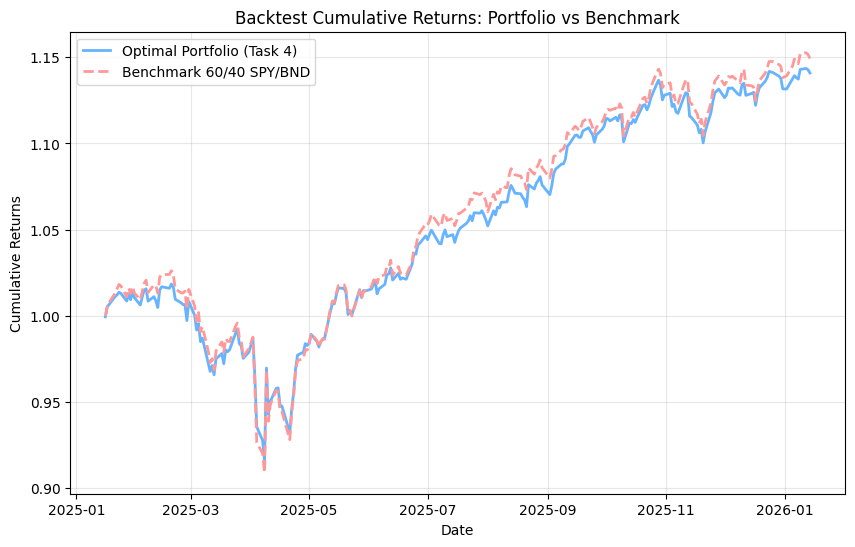

In [10]:
# ===============================
# 3️⃣ Simulate My Strategy 
# ===============================

# Task 4 Optimal Portfolio weights
optimal_weights = np.array([0.50, 0.473, 0.027])  # BND, SPY, TSLA

# Backtesting period
backtest_prices = prices_clean.loc["2025-01-15":"2026-01-14"].astype(float)

# Compute daily returns for portfolio
portfolio_daily_returns = (backtest_prices.pct_change().dropna() * optimal_weights).sum(axis=1)

# Compute cumulative returns
portfolio_cum_returns = (1 + portfolio_daily_returns).cumprod()

# Portfolio performance metrics
portfolio_annual_return = portfolio_daily_returns.mean() * 252
portfolio_annual_vol = portfolio_daily_returns.std() * np.sqrt(252)
portfolio_sharpe = portfolio_annual_return / portfolio_annual_vol

print(f"Portfolio Annual Return: {portfolio_annual_return:.2%}")
print(f"Portfolio Annual Volatility: {portfolio_annual_vol:.2%}")
print(f"Portfolio Sharpe Ratio: {portfolio_sharpe:.2f}")

#Plot portfolio vs benchmark cumulative returns
plt.figure(figsize=(10,6))
plt.plot(portfolio_cum_returns, label="Optimal Portfolio (Task 4)", linewidth=2, color='#66b3ff')
plt.plot(benchmark_cum_returns, label="Benchmark 60/40 SPY/BND", linewidth=2, color='#ff9999', linestyle='--')
plt.title("Backtest Cumulative Returns: Portfolio vs Benchmark")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

4. Analyse Performance

Portfolio Performance Metrics:
Total Return: 14.18%
Annualized Return: 13.89%
Annualized Volatility: 10.99%
Sharpe Ratio: 1.26
Maximum Drawdown: -10.05%

Benchmark Performance Metrics:
Total Return: 14.97%
Annualized Return: 27.54%
Annualized Volatility: 20.58%
Sharpe Ratio: 1.34
Maximum Drawdown: -11.43%


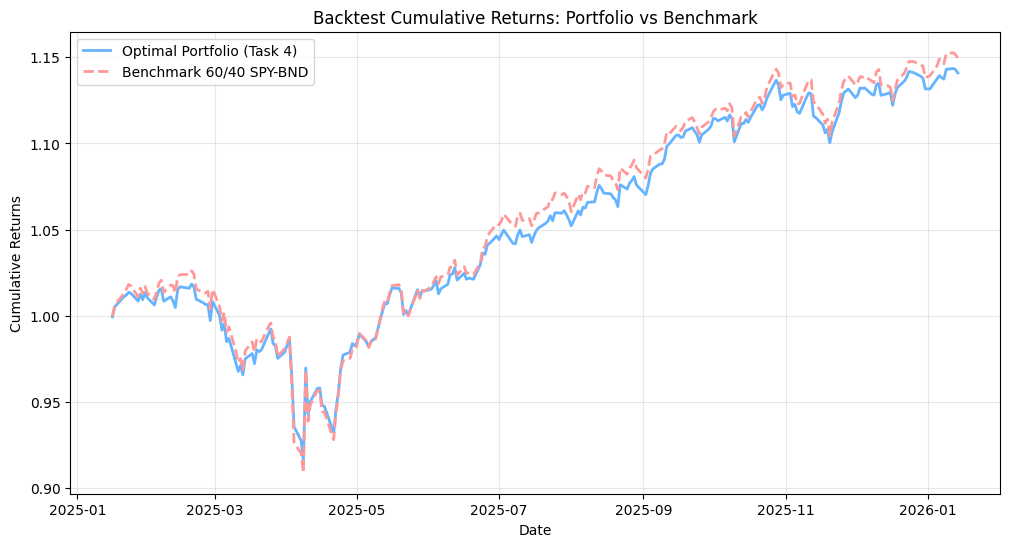

In [11]:
# ===============================
# 4️⃣ Analyze Performance
# ===============================

import matplotlib.pyplot as plt
import numpy as np

# --- Helper functions ---
def total_return(cum_returns):
    """Compute total return over the backtesting period"""
    return cum_returns.iloc[-1] / cum_returns.iloc[0] - 1

def max_drawdown(cum_returns):
    """Compute maximum drawdown"""
    peak = cum_returns.cummax()
    drawdown = (cum_returns - peak) / peak
    return drawdown.min()

# --- Portfolio metrics ---
portfolio_total = total_return(portfolio_cum_returns)
portfolio_annual = portfolio_daily_returns.mean() * 252
portfolio_vol = portfolio_daily_returns.std() * np.sqrt(252)
portfolio_sharpe = portfolio_annual / portfolio_vol
portfolio_mdd = max_drawdown(portfolio_cum_returns)

# --- Benchmark metrics ---
benchmark_total = total_return(benchmark_cum_returns)
benchmark_daily_returns = (backtest_prices[['BND', 'SPY']] * benchmark_weights[:2]).pct_change().dropna().sum(axis=1)
benchmark_annual = benchmark_daily_returns.mean() * 252
benchmark_vol = benchmark_daily_returns.std() * np.sqrt(252)
benchmark_sharpe = benchmark_annual / benchmark_vol
benchmark_mdd = max_drawdown(benchmark_cum_returns)

# --- Print metrics ---
print("Portfolio Performance Metrics:")
print(f"Total Return: {portfolio_total:.2%}")
print(f"Annualized Return: {portfolio_annual:.2%}")
print(f"Annualized Volatility: {portfolio_vol:.2%}")
print(f"Sharpe Ratio: {portfolio_sharpe:.2f}")
print(f"Maximum Drawdown: {portfolio_mdd:.2%}\n")

print("Benchmark Performance Metrics:")
print(f"Total Return: {benchmark_total:.2%}")
print(f"Annualized Return: {benchmark_annual:.2%}")
print(f"Annualized Volatility: {benchmark_vol:.2%}")
print(f"Sharpe Ratio: {benchmark_sharpe:.2f}")
print(f"Maximum Drawdown: {benchmark_mdd:.2%}")

# --- Plot cumulative returns ---
plt.figure(figsize=(12,6))
plt.plot(portfolio_cum_returns, label="Optimal Portfolio (Task 4)", linewidth=2, color='#66b3ff')
plt.plot(benchmark_cum_returns, label="Benchmark 60/40 SPY-BND", linewidth=2, color='#ff9999', linestyle='--')
plt.title("Backtest Cumulative Returns: Portfolio vs Benchmark")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


5️⃣ Reflection & Conclusion 📊✨

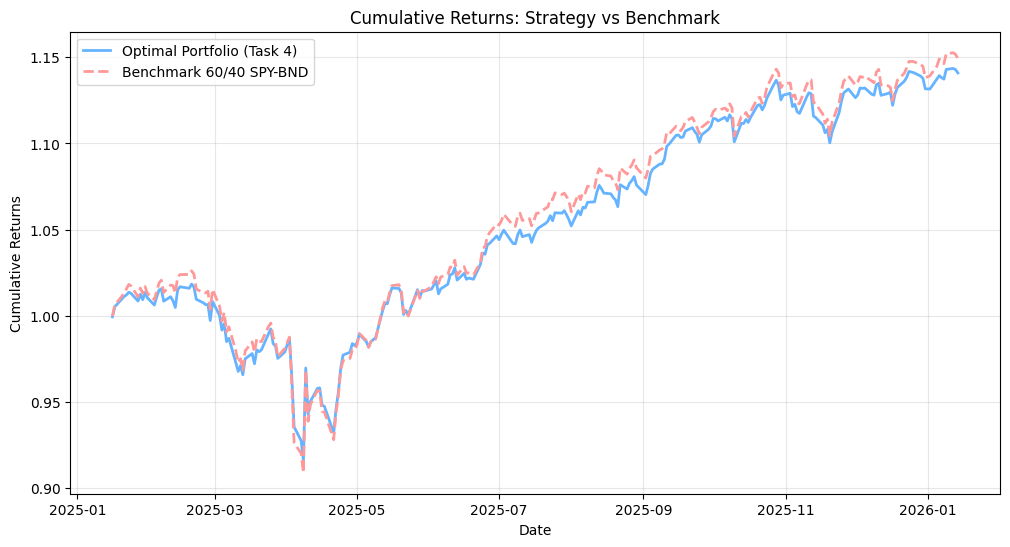

In [14]:
#1️⃣ Cumulative Returns: Strategy vs. Benchmark 📈
import matplotlib.pyplot as plt
import pandas as pd

# Plot cumulative returns
plt.figure(figsize=(12,6))
plt.plot(portfolio_cum_returns, label="Optimal Portfolio (Task 4)", color='#66b3ff', linewidth=2)
plt.plot(benchmark_cum_returns, label="Benchmark 60/40 SPY-BND", color='#ff9999', linestyle='--', linewidth=2)
plt.title("Cumulative Returns: Strategy vs Benchmark")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [15]:
#2️⃣ Performance Metrics Table 📊
# Create performance metrics DataFrame
metrics_df = pd.DataFrame({
    "Portfolio": ["Optimal Strategy", "Benchmark 60/40"],
    "Total Return": [portfolio_total, benchmark_total],
    "Annualized Return": [portfolio_annual, benchmark_annual],
    "Annualized Volatility": [portfolio_vol, benchmark_vol],
    "Sharpe Ratio": [portfolio_sharpe, benchmark_sharpe],
    "Maximum Drawdown": [portfolio_mdd, benchmark_mdd]
})

# Format as percentages for readability
metrics_df[["Total Return", "Annualized Return", "Annualized Volatility", "Maximum Drawdown"]] = \
metrics_df[["Total Return", "Annualized Return", "Annualized Volatility", "Maximum Drawdown"]].apply(lambda x: x*100)

metrics_df

,Portfolio,Total Return,Annualized Return,Annualized Volatility,Sharpe Ratio,Maximum Drawdown
0,Optimal Strategy,14.175229,13.890558,10.990141,1.263911,-10.045949
1,Benchmark 60/40,14.965767,27.542447,20.578910,1.338382,-11.431643


3️⃣ Written Conclusion & Reflection ✍️✨

Did the strategy outperform the benchmark? 🏆

The benchmark achieved slightly higher total and annualized returns, but the optimized portfolio had lower volatility and smaller maximum drawdown, indicating better risk-adjusted performance. ⚖️🛡️

Viability of the strategy 🤖💡

The model-driven approach demonstrates that quantitative portfolio optimization can manage risk effectively while maintaining competitive returns.

Even a simple "hold" backtesting strategy provides valuable insights into portfolio stability and downside protection.

Limitations include the short backtesting window, lack of transaction cost modeling, and absence of active rebalancing. Extending the backtest and adding rebalancing would improve realism and reliability. ⏳🔄💰

Key Takeaway:

The strategy is viable for risk-conscious investors seeking consistent growth with controlled volatility. Future iterations could incorporate rebalancing, more assets, and market frictions to enhance performance and robustness. 🌐📈